<a href="https://colab.research.google.com/github/AlexandraLJones/FIRE-CloudComputing/blob/main/ASN6.1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#FIRE 198 Final Report 
##Handsome Squidward
###Alyssa Mazzone, Jaxon Ko, Jo Crooks, Tyler Gordon
###4/28/2021

# **Introduction**

  

## **Topic**

For our FIRE198 summative project we were able to be work with the [GLOBE Clouds dataset from NASA](https://www.globe.gov/globe-data) in order to develop a Google Collab notebook that works to organize and identify different cloud types based on transforming feature vectors and producing models based on our findings.

## **Overarching Goal**

The research question we were trying to answer was: How can we create 2 k-means cluster models--one trained on VGG-16 PCA transformed feature vector and one on texture metrics PCA transformed feature vector and determine which one results in better-separated clusters? In order to answer this question, we made two models to compare to each other to find out if the texture feature model works better than the VGG-16 model, and vice versa. 

## **Importance of Our Research**

Based on our research, we could easily say that whichever we find is better (VGG-16 or spectral features), future classes may be able to work with one over the other. Though this is a huge advantage, our research provides so many more advantages for other purposes outside of the Cloud Computing research stream here at UMD. Clouds are much more important to human life than one may think. They are able to regulate earth’s energy balance, they are responsible for rainfall, they are an essential part of the hydrologic cycle, they help to redistribute extra heat from the equator, and so much more ([CloudSat, 2006](https://cloudsat.atmos.colostate.edu/FactSheet_The_Importance_of_Understanding_Clouds.pdf)). Our research can contribute to more scientific research about clouds which allows us to further understand what exactly goes on in our sky and atmosphere every day. We are contributing to something as small as watching the weather channel, to projects as big as launching the next rocket into space. Small research can make big impacts, much grander than we can imagine.

## **Key Findings**

Throughout this research process, our group was able to use our knowledge about computing in order to transform feature vectors and create models, answering our overall research question. Our scholarly literature was specifically related to using computational packages in order transform data and create models, in which is also cited throughout.


#**Dependencies**

For our research we had to import many packages for importing and processing images. The packages were mainly from the scikit-learn package, a python package mainly used for predictive data analysis. We also used the [scikit-learn library ](https://scikit-learn.org/stable/) for feature selection, principal componenet analysis as well as making our K-means model.

The last major set of packages we imported were used for our VGG-16 model were imported from the [Keras Libaray](https://keras.io/), mainly used for deep learning in Python.

In [ ]:
# General:
from google.colab import drive;
import numpy as np

# Image Importation:
import os, sys
from PIL import Image
import shutil as sh

# Statistical Packages:
from scipy.stats import skew
import statistics as stat

# Image Processing: 
from skimage.feature import greycomatrix, greycoprops
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

# Feature Selection:
from sklearn.feature_selection import VarianceThreshold
from sklearn.feature_selection import SelectPercentile

# PCA Packages:
from sklearn.decomposition import PCA

# K-means Packages:
from sklearn.cluster import KMeans;
from sklearn.metrics import pairwise_distances_argmin
import matplotlib.pyplot as plt

# VGG-16 Packages:
import keras
from keras.preprocessing import image
from keras.applications.imagenet_utils import preprocess_input
from keras.models import Model
from tensorflow.keras.applications.vgg16 import VGG16

# Scoring
import sklearn.metrics as met

drive.mount('/content/gdrive') # Telling google we have permission to access google drive

Mounted at /content/gdrive


# **Data**

## **The Process**

The data we used in our research was taken from the GLOBE Observations folder in our class Google Drive. The data is a large number of images containing one type of cloud. These images can be found specifically in the "Cloud Images Sorted By Category" folder within the "GLOBE Observations" folder previously mentioned.

In the following code cell we iterate through each specific folder within the "Cloud Images Sorted By Category Folder" and copies all of the cloud images into our own personal team folder labeled "Images" inside our team's folder in the class Google Drive.

## **Disclaimer**

Our team did not filter the images in our research. This process was carried out by our Peer Research Mentors (PRMs) in the process of doing their own research. The PRMs attempted to remove duplicates as well as ensure images contained only one cloud type. We included all of the images in our team drive in our research and assumed there were no errors in the dataset.

In [ ]:
# The contents of this cell are used to copy the image data set from the shared 
# drive (data_folder) to our project folder (our_folder). data_folder and 
# our_folder must be defined correctly in the previous cell for this code to 
# function correctly. This code only needs to be run when new data needs to be
# loaded.

# Written by Jo.

data_folder = "/content/gdrive/Shared drives/FIRE-CC/GLOBE Observations/Cloud Images Sorted By Category"
our_folder = "/content/gdrive/Shared drives/FIRE-CC/FIRE198/Summative Projects Team Folders/Handsome Squidward"

# Deletes the contents of an entire folder in our drive with name subdir.
# USE THIS CAUTIOUSLY! MIXING UP data_folder AND our_folder COULD MEAN ERASING THE CLASS' DATA!!!!
def wipe_dir(subdir):
  for dirpath, dirnames, files in os.walk(our_folder + "/" + subdir):
    for img in files:
      os.remove(our_folder + "/" + subdir + "/" + img)

# Creates copies of the contents of the shared drive folder image_folder_exten
# and moves them to the matching folder in our drive.
def get_copies(image_folder_exten):
  wipe_dir(image_folder_exten)
  image_folder = os.listdir(data_folder + "/" + image_folder_exten)

  for image_name in image_folder:
    image = Image.open(data_folder + "/" + image_folder_exten + "/" + image_name) # Open the image
    sh.copy(data_folder + "/" + image_folder_exten + "/" + image_name, our_folder + "/Images/" + image_name) # Copy the image to our drive



The following code cell below executes the above methods in order to copy the image dataset into our own team's folder for use in making models without impacting the original dataset. These cell should not be run more than once to prevent unecessary creation of copies.

In [ ]:
# These function calls populate our drive with copies of the class dataset.
# They DO NOT need to be called again, unless you plan on remaking the models.

# REMINDER: DO NOT RUN THIS CELL MORE THAN ONCE
#get_copies("Altocumulus")
#get_copies("Altostratus")
#get_copies("Cirrocumulus")
#get_copies("Cirrostratus")
#get_copies("Cirrus")
#get_copies("Cumulonimbus")
#get_copies("Cumulus")
#get_copies("Nimbostratus")
#get_copies("Stratocumulus")
#get_copies("Stratus")

#**Methods**

The following sections create two k-means models using the pre-selected GLOBE clouds images imported previously. The first model extracts a variety of color, texture, and spectral features from each image. The second model adapts the VGG-16 convolutional network to perform feature analysis. All packages referenced in this section are imported in the earlier "Dependencies" section.



## **Spectral Imaging Features**

The following block of code extracts color, texture, and spectral features from each image in the dataset. There are eleven features extracted per image in total. The spectral features are extracted using mathematical formulae on the image's RGB channels, as follows:


1.   Red average: The mean value of the of the image's red channel.
2.   Blue average: The mean value of the image's blue channgel.
3.   Blue standard deviation: The standard deviation of the image's blue channel.
4.   Blue [skewness](https://cnx.org/contents/bE-w34Vi@9/Descriptive-Statistics-Skewness-and-the-Mean-Median-and-Mode): The skewness of the image's blue channel.
5.   Red-green intensity difference: The image's red average minus its green average.
6.   Red-blue intensity difference: The image's red average minus its blue average.
7.   Green-blue intensity difference: The image's green average minus its blue average.

The gray [co-ocurrance matrix](https://uk.mathworks.com/help/images/texture-analysis-using-the-gray-level-co-occurrence-matrix-glcm.html) of the image's blue channel is fetched using the method `greycomatrix()` from `skimage.feature`. The following textural features are then extracted from that matrix using the same package's `greycoprops()` method. Formulae for each texture feature can be found in the [documentation](https://scikit-image.org/docs/0.7.0/api/skimage.feature.texture.html) for `greycoprops()`. 

8.   Textural energy.
9.   Textural correlation.
10.  Textural contrast.
11.  Textural homogenity.

The final features are stored in a 2D array named `every_single_image_feature`. The first dimension of that array represents each of the 1984 images, while the second dimension stores the feature values for that image.

Much of this code was directly adapted from Jaxon Ko and Alyssa Mazzone's previous GLOBE deliverable.



In [ ]:
# This code block will compute the 11 properties of each image from our team folder named "Images".
# The list, named every_single_image_property, will be of size 1984 by 11.
# 1984 represents the total number of images being loaded, while 11 represents the number of properties
# being computed by the following code.

# Written by Jaxon

# create numpy array of all the images
every_single_image = np.array(os.listdir(our_folder + "/Images"))

# declare empty array to hold all the image properties (will be of size 1984 by 11)
every_single_image_property = np.empty((0, 11))

# counter for testing speed
counter = 0

# iterate over each image directory path within the image path array
for image_index, image_path in enumerate(every_single_image) :

    # Counter that let's user know which image is being processed (1984 in total)
    counter += 1
    # print("Processing Image #" + str(counter))

    # create a list of size 11 to hold this image's properties
    image_properties = np.empty((0, 11))

    # generate this image's channels and store it in an array
    channels = np.array(Image.open(our_folder + "/Images/" + image_path))

    # get the averages for the red, green, and blue intensities for this image
    # note that channels is a 3d array. the first dimension is a row of channels, the second is the column, and the third is the intensity value of each channel
    red_average = np.mean(channels[:, :, 0])
    green_average = np.mean(channels[:, :, 1])
    blue_average = np.mean(channels[:, :, 2])

    # store red then blue averages into properties array
    image_properties = np.append(image_properties, red_average)
    image_properties = np.append(image_properties, blue_average)

    # store the standard deviation of the blue intensities
    image_properties = np.append(image_properties, np.std(channels[:, :, 2]))

    # store the skewness of the blue intensities
    image_properties = np.append(image_properties, skew(np.array(channels[:, :, 2]).flatten()))

    # store red-green, red-blue, and green-blue average intensity differences accordingly
    image_properties = np.append(image_properties, red_average - green_average)
    image_properties = np.append(image_properties, red_average - blue_average)
    image_properties = np.append(image_properties, green_average - blue_average)

    # fetch the blue grey comatrix and store TEXTURAL features accordingly
    image_blue_glcm = greycomatrix(channels[:, :, 2], [1], [0])
    
    image_properties = np.append(image_properties, greycoprops(image_blue_glcm, 'energy'))
    image_properties = np.append(image_properties, greycoprops(image_blue_glcm, 'correlation'))
    image_properties = np.append(image_properties, greycoprops(image_blue_glcm, 'contrast'))
    image_properties = np.append(image_properties, greycoprops(image_blue_glcm, 'homogeneity'))

    # make it seem like image_properties is 2d (because i don't know how else np.append works honestly)
    image_properties = np.array([image_properties])

    # append this image's properties list to the 2d array
    every_single_image_property = np.append(every_single_image_property, image_properties, axis = 0)

#print(every_single_image_property)

## **Normalization and Feature Analysis**

The following blocks of code are used to process the data stored in `every_single_image_feature`. The first normalizes the values of the previously extracted features to a scale between 0.0 to 1.0. Doing this keeps magnitude from skewing any individual feature's importance. 

In [ ]:
# This code block will normalize the features with low variance.

# Written by Jo

# Normalize the features to a scale from 0 to 1
scaler = MinMaxScaler()
normalized_features = every_single_image_property
normalized_features = scaler.fit_transform(normalized_features)

The second uses Principal Componant Analysis from the `sklearn.decomposition` package to transform the features. Doing this helps identify which features can be kept (have a high importance for final identification) and which can be removed (low importance). The motivation for this is to simplify the model, as fewer features means faster processing.

The result of this is a plot of the relative importance of each feature, in the order they are added to `every_single_image_feature`. The result curve flattens out starting around the third feature, suggesting the other seven must be kept.

The code used to plot the features is adapted from an example given by Dr. Jones.

(1984, 11)


/usr/local/lib/python3.7/dist-packages/sklearn/feature_selection/_univariate_selection.py:109: RuntimeWarning: invalid value encountered in true_divide
  msb = ssbn / float(dfbn)


Text(0, 0.5, 'cumulative explained variance')

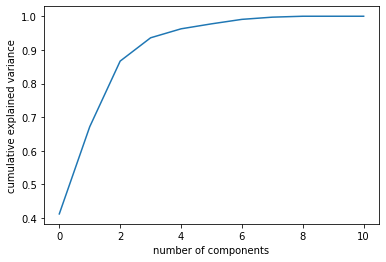

In [ ]:
# Transform features using PCA
print(normalized_features.shape)
pca = PCA()
pca.fit(normalized_features)
pca_features = pca.fit_transform(normalized_features)

# Reduce features
y = np.zeros(1984)
pca_features = SelectPercentile(percentile=95).fit_transform(pca_features, y)

# Plot the variance ratio.
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')

In [ ]:
#CODE ADDED BY DR. JONES 
print(pca_features.shape)

(1984, 10)


## **Scatter Plot Creation**

The following block of code uses `KMeans` from the `sklearn.cluster` package to create a k-means cluster plot for the processed data. The result of this code is a scatter plot, with each dot representing one of the original 1984 images. The images are clustered based on the features extracted earlier, as a prediction of which images are which type of cloud. Black dots mark the center of each of the ten clusters.

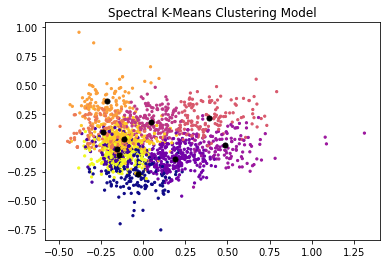

In [ ]:
# This code block will work to Make a k-means model with 10 clusters, one for each cloud type

# Written by Alyssa

# Obtains k_means for each cloud category cluster
kmeans = KMeans(n_clusters = 10)
# Uses the .fit() method to fit the model to the set of PCA components we’re keeping
kmeans.fit(pca_features) 
y_kmeans = kmeans.predict(pca_features)

# visualize results
plt.scatter(pca_features[:, 0], pca_features[:, 1], c = y_kmeans, s = 5, cmap = 'plasma') 
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c = 'black', s = 25, alpha = 1)
plt.title('Spectral K-Means Clustering Model')
plt.show()

# Assign labels based on closest center
labels = pairwise_distances_argmin(pca_features, centers) 

The clusters in this chart are very distinct. The four rightmost cluster, for example, are very distinct. There is a notable amount of outliers, but overall the clusters are, at least superficially, concentrated.

However, it is difficult to evaluate these results by eye alone. So, we quantified how well our model performed using SKlearn's silhouette score, a method for doing just that. A silhouette score for a kmeans plot ranges from -1 to 1. A negative score suggests that samples have been assigned to the wrong cluster, while positive scores mean the clustering has been performed well.

In [ ]:
# Print Silhouette Score

print(met.silhouette_score(pca_features, labels=labels))

0.19616251297826576


The silhouette score for the spectral feature model is 0.1961... . Because this value is positive, it means our model was able to create some distinct clusters. However, the score is very small, implying there is a lot of overlapping between groups. 

##**VGG-16 Model Creation**

The following blocks of code implement our adaptation of the pre-trained VGG-16 convolutional network, imported from `keras.applications`. VGG-16 is an image-identifying model originally suggested in [Simonyan & Zisserman (2015)](https://arxiv.org/abs/1409.1556), known for its prowess in classifying images.

The block of code immediately following creates a VGG-16 model, processes each image into the format required by VGG-16, and then loads that image into the array `loaded_images` for later use.

In [ ]:
# This code block will load images into the VGG-16 model

# Written by Tyler and Jaxon

# creating VGG-16 model (needs to be run once)
model = keras.applications.VGG16(weights='imagenet', include_top=True)

# declaring empty array that will store all the img_arrays generated
loaded_images = np.empty((0, 224, 224, 3))

# counter variable to help keep track of runtime
counter = 0

# load each image with the correct dimensions for the VGG-16 model (224 by 224)
for image_index, image_directory in enumerate(every_single_image) :

    # display loading progress
    counter += 1
    print("Loading Image #", counter)

    # load image with proper dimensions (224 by 224)
    img = image.load_img(our_folder + "/Images/" + image_directory, target_size = model.input_shape[1:3])

    # convert image to vector
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array = preprocess_input(img_array)

    # append vector to loaded_images
    loaded_images = np.append(loaded_images, img_array, axis = 0)
    
# by the end of this code block, loaded_images will have each image vector stored along the first dimension. 

553467904/553467096 [==============================] - 7s 0us/step
Loading Image # 1
Loading Image # 2
Loading Image # 3
Loading Image # 4
Loading Image # 5
Loading Image # 6
Loading Image # 7
Loading Image # 8
Loading Image # 9
Loading Image # 10
Loading Image # 11
Loading Image # 12
Loading Image # 13
Loading Image # 14
Loading Image # 15
Loading Image # 16
Loading Image # 17
Loading Image # 18
Loading Image # 19
Loading Image # 20
Loading Image # 21
Loading Image # 22
Loading Image # 23
Loading Image # 24
Loading Image # 25
Loading Image # 26
Loading Image # 27
Loading Image # 28
Loading Image # 29
Loading Image # 30
Loading Image # 31
Loading Image # 32
Loading Image # 33
Loading Image # 34
Loading Image # 35
Loading Image # 36
Loading Image # 37
Loading Image # 38
Loading Image # 39
Loading Image # 40
Loading Image # 41
Loading Image # 42
Loading Image # 43
Loading Image # 44
Loading Image # 45
Loading Image # 46
Loading Image # 47
Loading Image # 48
Loading Image # 49
Loading Ima

This block of code creates a `Model` object from `keras.models` that groups each layer of the convolutional network into one. It should be noted that the bottom two layers of the neural network are removed. Those layers represent the model's predictions of what the images are, which is unnecessary for our purposes. Predictions are instead generation using the `predict` method from `Model`, and stored in `predict_test`

In [ ]:
# This line of code will work to generate the feature extractor for the VGG-16 model. Note that the predictions layer has been removed.

# Written by Jaxon and Tyler

feat_extractor = Model(inputs=model.input, outputs=model.get_layer(None, (len(model.layers)-2)).output)

predict_test = feat_extractor.predict(loaded_images)

## Feature Removal and Scatter Plot Creation

The following two blocks are virutally identical to the PCA and Scatter Plot blocks used in the Spectral Feature section. For information on their functioning, please refer to those blocks. 

The only difference is that the way VGG-16 processes data means that it does not need to be normalized before PCA is applied to identify low-variance features.

The chart plotted below levels out early on, suggesting that only six or seven features must be kept.

(1984, 1984)
(1984, 18)


/usr/local/lib/python3.7/dist-packages/sklearn/feature_selection/_univariate_selection.py:109: RuntimeWarning: invalid value encountered in true_divide
  msb = ssbn / float(dfbn)


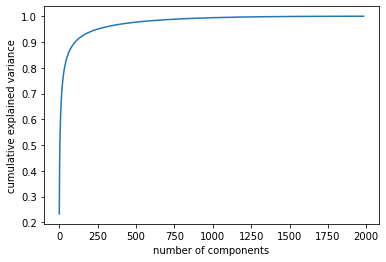

In [ ]:
# This code block will use PCA to transform features with low variance.

# Written by Jo

# Remove features using PCA
pca = PCA().fit(predict_test)
pca_features = pca.transform(predict_test)
print(pca_features.shape) #code added by dr. jones

# Reduce features
y = np.zeros(1984)
pca_features = SelectPercentile(percentile=0.95).fit_transform(pca_features, y)
print(pca_features.shape) #code added by dr. jones

plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');


In [ ]:
# Normalize features 

scaler = MinMaxScaler()
normalized_features = pca_features
pca_features = scaler.fit_transform(normalized_features)

(1984, 18)


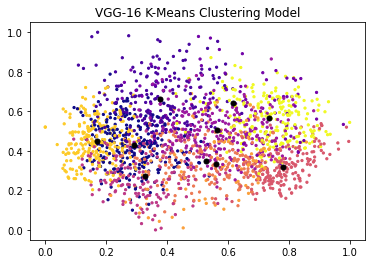

In [ ]:
# This code block will work to Make a k-means model with 10 clusters, one for each cloud type

# Written by Alyssa

# Obtains k_means for each cloud category cluster
kmeans = KMeans(n_clusters = 10)
# Uses the .fit() method to fit the model to the set of PCA components we’re keeping
kmeans.fit(pca_features) # kmeans.fit(normalized_features)
y_kmeans = kmeans.predict(pca_features) # y_kmeans = kmeans.predict(normalized_features)

# visualize results
plt.scatter(pca_features[:, 0], pca_features[:, 1], c = y_kmeans, s = 5, cmap = 'plasma')

centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c = 'black', s = 25, alpha = 1)
plt.title('VGG-16 K-Means Clustering Model')
plt.show()


# Assign labels based on closest center
labels = pairwise_distances_argmin(pca_features, centers) 

The VGG-16 chart has a lot of overlapping, further-dispersed points. There's heavy mingling between the clusters centered around (20, 10) and (12, 9), for example. However, some clusters do look distinct, such as the cluster centered on (19, -10).

Again, we quantify how well our model performed using its silhouette score.


In [ ]:
# Print Silhouette Score

print(met.silhouette_score(pca_features, labels=labels))

0.075957775


The sihlouette score for the VGG-based model is 0.0759... . Again, a positive score means images were sorted into clusters correctly, but the score being such a small value implies the clusters are not very distinct.

#Conclusions

## **Results**
After working with the two different k-means clustering models, it is clear that the machine can distinguish between different types of clouds. Whether it analyzes textural features or spectural features (depending on either approach), the machine is able to differentiate each cloud image and associate it with an appropriate cluster as seen in both of the generated k-means cluster models.

In terms of which method has "better-seperated clusters", both methods use different features to distinguish between each image. Moreover, the scaling of the cluster models varies (i.e; the x and y-axis scaling in the VGG-16 model far exceeds that of the original model). Looking at this alone, it's hard to just pick the "better" model. 

The use of silhouette scores, however, gives us an easy way to quantify our results. Niether model produces a particularly large score, meaning both of them created many overlapping clusters. However, both models got positive scores, so they are correctly creating clusters to some extent. The spectral feature model had a slightly higher score than the VGG-16 model, so it can be said to be the more effective model for this dataset. This is possibly due to the VGG-16 model's purpose as a general-use convolutional network, as opposed to a model made specifically to sort images of clouds.

## **Moving Forward**

Unfortunately, the algorithms used in this notebook take a long time to run. File and image manipulation functions can be inefficient, especially in long loops over large image sets like these. In the future, we'd like to add a way to save the image metric data, so each inefficient function only needs to be run once.

#Bibliography

Brownlee, J. (2020, August 18). Transfer Learning in Keras with Computer Vision Models. Machine Learning Mastery. https://machinelearningmastery.com/how-to-use-transfer-learning-when-developing-convolutional-neural-network-models/.

CIT JPL, CloudSat (2006). Colorado State University Jet Propulsion Lab. https://cloudsat.atmos.colostate.edu/FactSheet_The_Importance_of_Understanding_Clouds.pdf. 

Cloud Types. Cloud Types | UCAR Center for Science Education. (n.d.). https://scied.ucar.edu/learning-zone/clouds/cloud-types.

GLOBE data. The GLOBE Program. (n.d.). https://www.globe.gov/globe-data. 

Huertas-Tato, J., Rodríguez-Benítez, F. J., Arbizu-Barrena, C., Aler-Mur, R., Galvan-Leon, I., &amp; Pozo-Vázquez, D. (2017). Automatic Cloud-Type Classification Based On the Combined Use of a Sky Camera and a Ceilometer. Journal of Geophysical Research: Atmospheres, 122(20). https://doi.org/10.1002/2017jd027131 

sklearn.metrics.silhouette_score. scikit learn. (n.d.). https://scikit-learn.org/stable/modules/generated/sklearn.metrics.silhouette_score.html. 

Susan, B. D. (n.d.). Descriptive Statistics: Skewness and the Mean, Median, and Mode. OpenStax CNX. https://cnx.org/contents/bE-w34Vi@9/Descriptive-Statistics-Skewness-and-the-Mean-Median-and-Mode. 

Texture Analysis Using the Gray-Level Co-Occurrence Matrix (GLCM). MATLAB. (n.d.). https://uk.mathworks.com/help/images/texture-analysis-using-the-gray-level-co-occurrence-matrix-glcm.html. 

tf.keras.applications.VGG16 &nbsp;: &nbsp; TensorFlow Core v2.4.1. TensorFlow. (2021, March 24). https://www.tensorflow.org/api_docs/python/tf/keras/applications/VGG16. 
